In [22]:
import numpy as np 
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils 
from keras import backend as K 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv("dict.csv", header = None, names = ["Angles", "XY"])

In [7]:
data.head(10)

,Angles,XY
0,"(0.3514, -0.2365, -0.1968, -0.1949, -0.0863)",[ 3.3793 -1.2376 0.25 ]
1,"(0.3094, 0.4925, 0.4629, -0.1565, 0.3523)",[2.061 2.5772 0.25 ]
2,"(0.1157, -0.4121, 0.0578, 0.3772, 0.428)",[3.4905 0.9227 0.25 ]
3,"(0.339, -0.1037, -0.2424, 0.2975, 0.0062)",[ 3.6355 -0.1753 0.25 ]
4,"(0.2312, -0.4059, -0.0095, 0.4335, 0.4635)",[3.4413 0.9989 0.25 ]
5,"(-0.4137, 0.2597, 0.4613, -0.3463, -0.0408)",[3.4743 0.8149 0.25 ]
6,"(0.4124, 0.2546, -0.2049, -0.0035, 0.2845)",[3.3598 1.3618 0.25 ]
7,"(0.273, -0.0413, -0.2412, 0.2292, -0.4313)",[ 3.2972 -1.5038 0.25 ]
8,"(-0.4171, -0.0979, -0.3272, -0.2378, 0.1323)",[ 3.3774 -0.8196 0.25 ]
9,"(-0.165, 0.3236, -0.2667, -0.0649, -0.0461)",[3.663 0.0381 0.25 ]


In [8]:
train = data['Angles'].to_numpy()
labels = data['XY'].to_numpy()

In [9]:
X = list()
Y = list()
for i in range(len(train)):
    labels[i] = labels[i].replace('   ', ' ')
    labels[i] = labels[i].replace('  ', ' ')
    labels[i] = labels[i].strip('[ ').strip(' ]')
    train[i] = train[i].strip('(').strip(')')
    result = [float(val) for val in train[i].split(',')]
    X.append(result)
    result = [float(val) for val in labels[i].split(' ')]
    Y.append(result)
  

In [10]:
X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)

In [11]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(200, 5)
(200, 3)
(801, 5)
(801, 3)


In [12]:
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)

In [13]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss=rmse, optimizer=Adam(0.01))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 16)                176       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 270
Trainable params: 270
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train, y_train, epochs = 15)

Epoch 1/15
7/7 [==============================] - 1s 2ms/step - loss: 2.3348
Epoch 2/15
7/7 [==============================] - 0s 2ms/step - loss: 1.8634
Epoch 3/15
7/7 [==============================] - 0s 2ms/step - loss: 1.2254
Epoch 4/15
7/7 [==============================] - 0s 2ms/step - loss: 0.9839
Epoch 5/15
7/7 [==============================] - 0s 2ms/step - loss: 0.8951
Epoch 6/15
7/7 [==============================] - 0s 2ms/step - loss: 0.7919
Epoch 7/15
7/7 [==============================] - 0s 2ms/step - loss: 0.6751
Epoch 8/15
7/7 [==============================] - 0s 3ms/step - loss: 0.5417
Epoch 9/15
7/7 [==============================] - 0s 2ms/step - loss: 0.4262
Epoch 10/15
7/7 [==============================] - 0s 2ms/step - loss: 0.3852
Epoch 11/15
7/7 [==============================] - 0s 2ms/step - loss: 0.3471
Epoch 12/15
7/7 [==============================] - 0s 2ms/step - loss: 0.3329
Epoch 13/15
7/7 [==============================] - 0s 2ms/step - loss: 0.

In [16]:
scores = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.2f" % (scores))

RMSE: 0.29


In [17]:
print(model.predict(X_train[10].reshape(1,5)))
print(y_train[10])

[[3.246313  1.4154907]]
[3.2958 1.3238]


In [18]:
X = list()
Y = list()
for i in range(len(train)):
    labels[i] = labels[i].replace('   ', ' ')
    labels[i] = labels[i].replace('  ', ' ')
    labels[i] = labels[i].strip('[ ').strip(' ]')
    train[i] = train[i].strip('(').strip(')')
    result = [float(val) for val in train[i].split(',')]
    X.append(result)
    result = [float(val) for val in labels[i].split(' ')]
    Y.append(result)

In [19]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss=rmse, optimizer=Adam(0.01))

In [20]:
test_size_rmse = []
n = range(100, 5100, 100)
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(np.asarray(X[0:i*100]), np.asarray(Y[0:i*100]), test_size=0.80)
    y_train = np.delete(y_train, 2, 1)
    y_test = np.delete(y_test, 2, 1)
    model.fit(X_train, y_train, epochs = 10, verbose = 0)
    scores = model.evaluate(X_test, y_test, verbose=0) 
    test_size_rmse.append(scores)
    

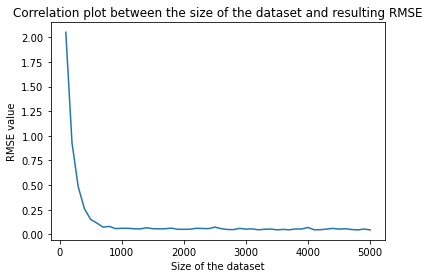

In [23]:
plt.plot(n,test_size_rmse)
plt.xlabel("Size of the dataset")
plt.ylabel("RMSE value")
plt.title("Correlation plot between the size of the dataset and resulting RMSE")
plt.show()

In [24]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_logarithmic_error', optimizer=Adam(0.01))

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_msle = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_msle))

RMSE: 0.04898


In [25]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_absolute_error', optimizer=Adam(0.01))

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_mae = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_mae))

RMSE: 0.23167


In [26]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=Adam(0.01))

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_mse = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_mse))

RMSE: 0.11077


In [27]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss=rmse, optimizer=Adam(0.01))

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores))

RMSE: 0.47428


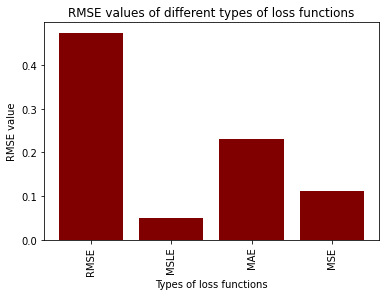

In [28]:
error_names = ['RMSE','MSLE','MAE','MSE']
errors = [scores, scores_msle, scores_mae, scores_mse]

plt.bar(range(len(error_names)), errors, color = 'maroon')
plt.xticks(range(len(error_names)), error_names, rotation='vertical')
plt.xlabel("Types of loss functions")
plt.ylabel("RMSE value")
plt.title("RMSE values of different types of loss functions")
plt.show()

In [29]:
layers_scores = []

for i in range(1,30):
    model = Sequential()
    numb = 0
    model.add(Dense(10, input_dim =5, activation = 'relu'))
    numb += 1
    for r in range(1,i):
        model.add(Dense(16, activation = 'relu'))
        numb += 1
    model.add(Dense(2, activation='linear'))
    numb += 1
    model.compile(loss='mean_squared_logarithmic_error', optimizer=Adam(0.01))

    X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
    y_train = np.delete(y_train, 2, 1)
    y_test = np.delete(y_test, 2, 1)
    model.fit(X_train, y_train, epochs = 10, verbose = 0)
    score = model.evaluate(X_test, y_test, verbose=0) 
    print("Numer of layers: %d |   RMSE: %.5f" % (numb, score))
    layers_scores.append(score)

Numer of layers: 2 |   RMSE: 0.02464
Numer of layers: 3 |   RMSE: 0.02195
Numer of layers: 4 |   RMSE: 0.13335
Numer of layers: 5 |   RMSE: 0.01019
Numer of layers: 6 |   RMSE: 0.01096
Numer of layers: 7 |   RMSE: 0.00878
Numer of layers: 8 |   RMSE: 0.13627
Numer of layers: 9 |   RMSE: 0.12924
Numer of layers: 10 |   RMSE: 0.07073
Numer of layers: 11 |   RMSE: 0.05674
Numer of layers: 12 |   RMSE: 1.08168
Numer of layers: 13 |   RMSE: 0.08131
Numer of layers: 14 |   RMSE: 0.12631
Numer of layers: 15 |   RMSE: 0.13700
Numer of layers: 16 |   RMSE: 0.13020
Numer of layers: 17 |   RMSE: 0.05010
Numer of layers: 18 |   RMSE: 0.12858
Numer of layers: 19 |   RMSE: 0.13179
Numer of layers: 20 |   RMSE: 0.12868
Numer of layers: 21 |   RMSE: 0.13585
Numer of layers: 22 |   RMSE: 0.08297
Numer of layers: 23 |   RMSE: 1.19854
Numer of layers: 24 |   RMSE: 0.12828
Numer of layers: 25 |   RMSE: 1.15977
Numer of layers: 26 |   RMSE: 0.13765
Numer of layers: 27 |   RMSE: 0.12745
Numer of layers: 28 

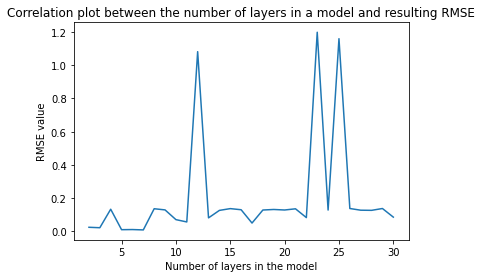

In [30]:
numb_arr = range(2,31)

plt.plot(numb_arr,layers_scores)
plt.xlabel("Number of layers in the model")
plt.ylabel("RMSE value")
plt.title("Correlation plot between the number of layers in a model and resulting RMSE")
plt.show()

In [31]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_logarithmic_error', optimizer=Adam(0.01))

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_adam = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_adam))

RMSE: 0.01456


In [32]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_logarithmic_error', optimizer='sgd')

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_adam = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_adam))

RMSE: 0.26282


In [33]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_logarithmic_error', optimizer='Adagrad')

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_adam = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_adam))

RMSE: 1.07299


In [34]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_logarithmic_error', optimizer='Adadelta')

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_adam = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_adam))

RMSE: 1.18826


In [35]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_logarithmic_error', optimizer='RMSprop')

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_adam = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_adam))

RMSE: 0.36993


Old RMSE=0.29 New RMSE=0.01456 <br>
Number of layers: 5<br>
Loss function: MSLE - Mean Squared Logarithmic Error